In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

%matplotlib inline

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


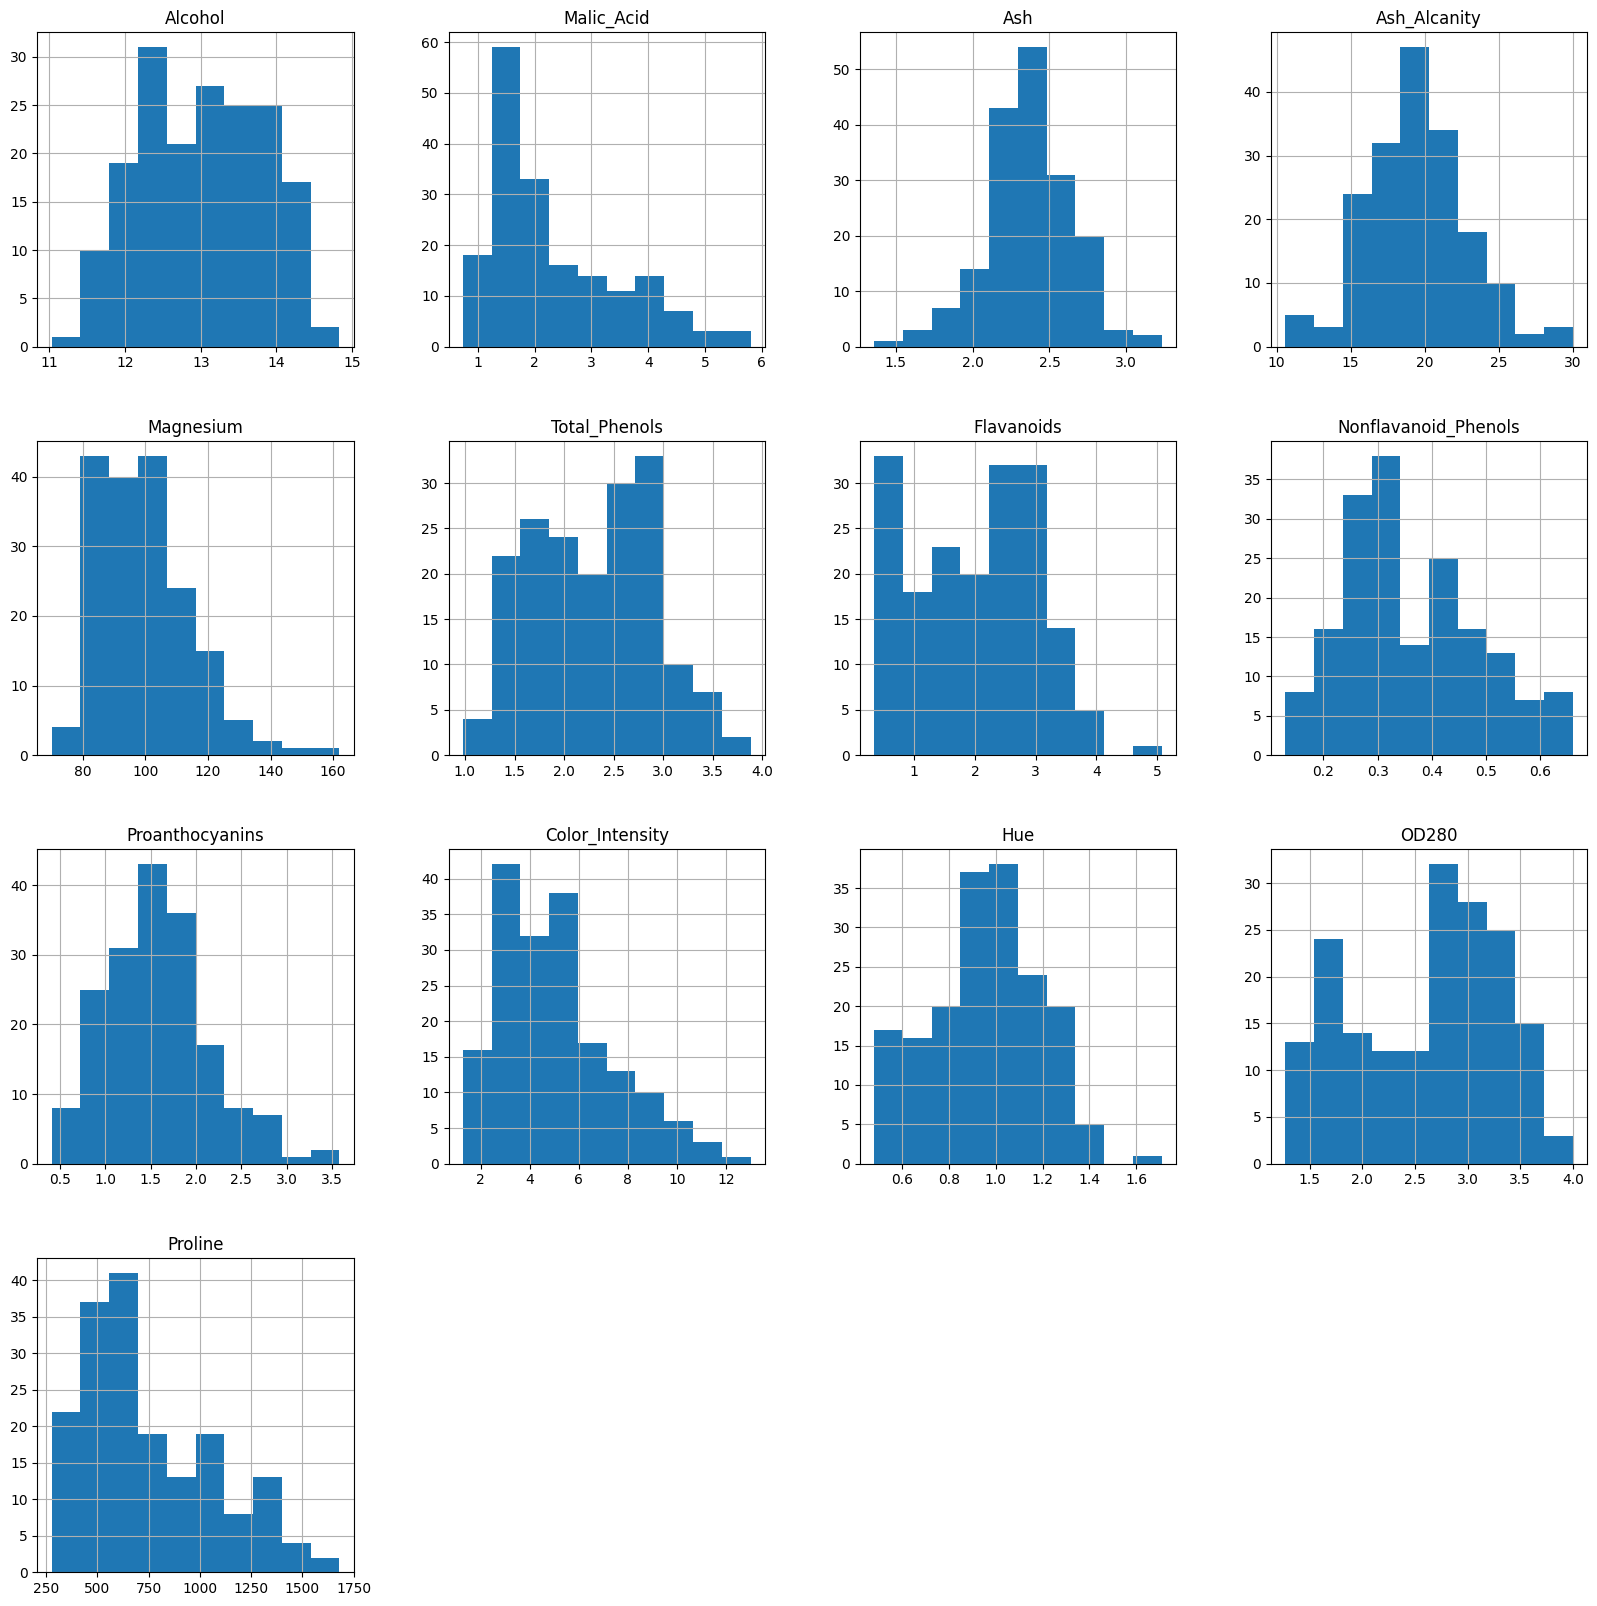

In [7]:
df.hist(figsize=(20, 20));

In [8]:
normal_columns = ['Alcohol', 'Ash', 'Ash_Alcanity', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Hue']

In [9]:
df['Proline'].skew()

0.7678217813897322

Ассиметрия позволяет оценить смещение распределения:  
- \> 0 - смещение вправо  
- < 0 - смещение влево   
- = 0 - нормальное распределение

Коэффицент эксцесса также позволяет определить, нормально ли распределены данные, есть ли выбросы: 
- 0...1 - данные нормально распределены
- \> 1 - скорее всего есть выбросы
- < 0 - данные распределены равномерно

Тест Шапиро-Уилка, позволяет также посмотреть, относятся ли данные к нормальному распределению. Нулевая гипотеза теста Шапиро заключается в том, что данные распределены нормально. Гипотеза отвергается в том случае если p-value > 0,05

In [10]:
def normal_analyz(column):
    plt.figure(figsize=(20, 20))
    qqplot(data=column, line='s')
    plt.title(column.name)
    plt.show()

    print(f'Ассиметрия - {column.skew()}')
    print(f'Коэффицент эксцесса - {column.kurtosis()}')

    shapiro_test_res = shapiro(column)
    print(f'Результаты теста Шапиро: p-value - {shapiro_test_res.pvalue}\n\n')

<Figure size 2000x2000 with 0 Axes>

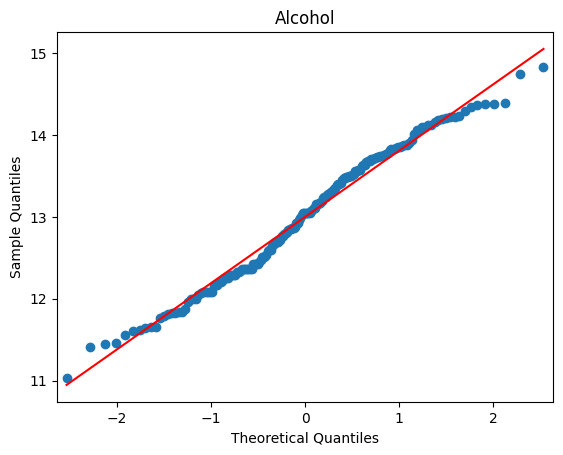

Ассиметрия - -0.051482331077134784
Коэффицент эксцесса - -0.8524995684849164
Результаты теста Шапиро: p-value - 0.020050711929798126




<Figure size 2000x2000 with 0 Axes>

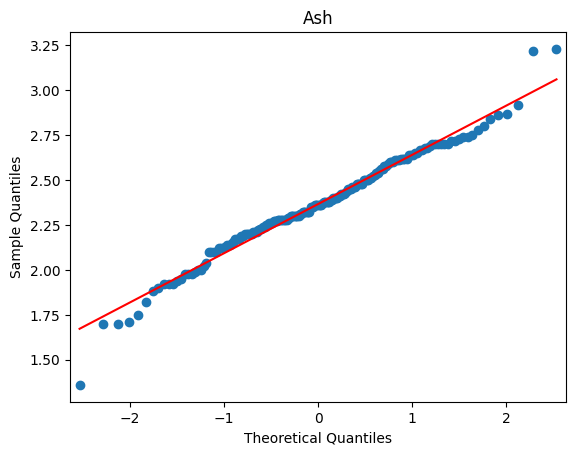

Ассиметрия - -0.17669931645735712
Коэффицент эксцесса - 1.1439781688330677
Результаты теста Шапиро: p-value - 0.038691021502017975




<Figure size 2000x2000 with 0 Axes>

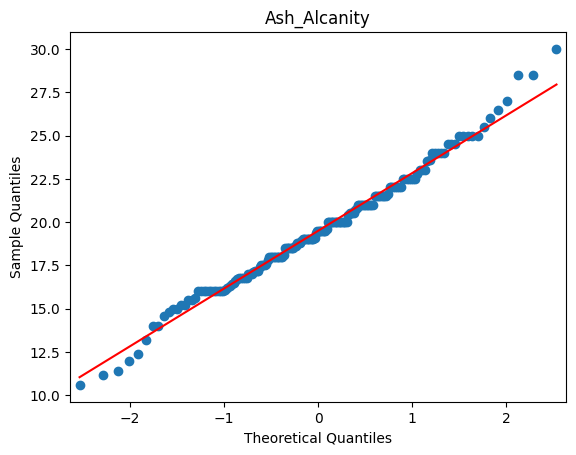

Ассиметрия - 0.21304688642645586
Коэффицент эксцесса - 0.4879415404679124
Результаты теста Шапиро: p-value - 0.26394858956336975




<Figure size 2000x2000 with 0 Axes>

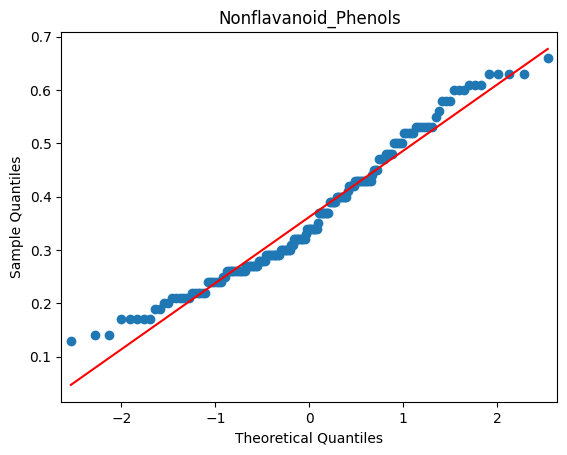

Ассиметрия - 0.4501513355621236
Коэффицент эксцесса - -0.6371910641424079
Результаты теста Шапиро: p-value - 0.00010552681487752125




<Figure size 2000x2000 with 0 Axes>

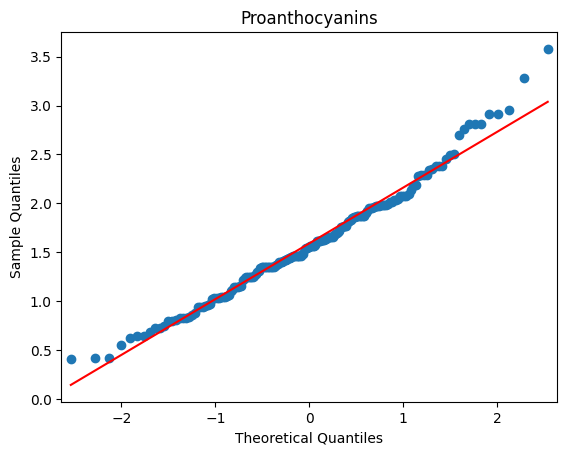

Ассиметрия - 0.5171371722998975
Коэффицент эксцесса - 0.5546485226011098
Результаты теста Шапиро: p-value - 0.01445252075791359




<Figure size 2000x2000 with 0 Axes>

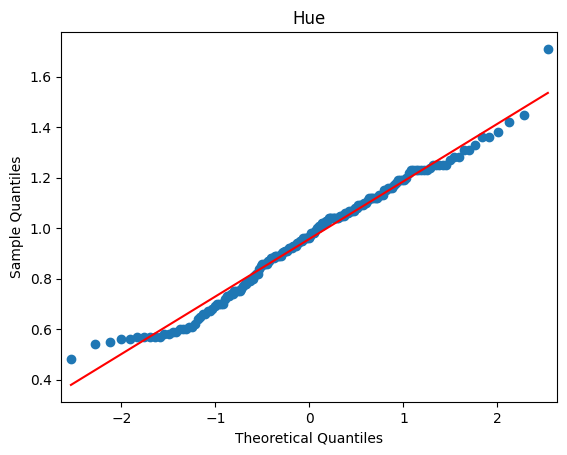

Ассиметрия - 0.021091272199709302
Коэффицент эксцесса - -0.3440957413614769
Результаты теста Шапиро: p-value - 0.01742566004395485




In [11]:
for column in normal_columns:
    normal_analyz(df[column])

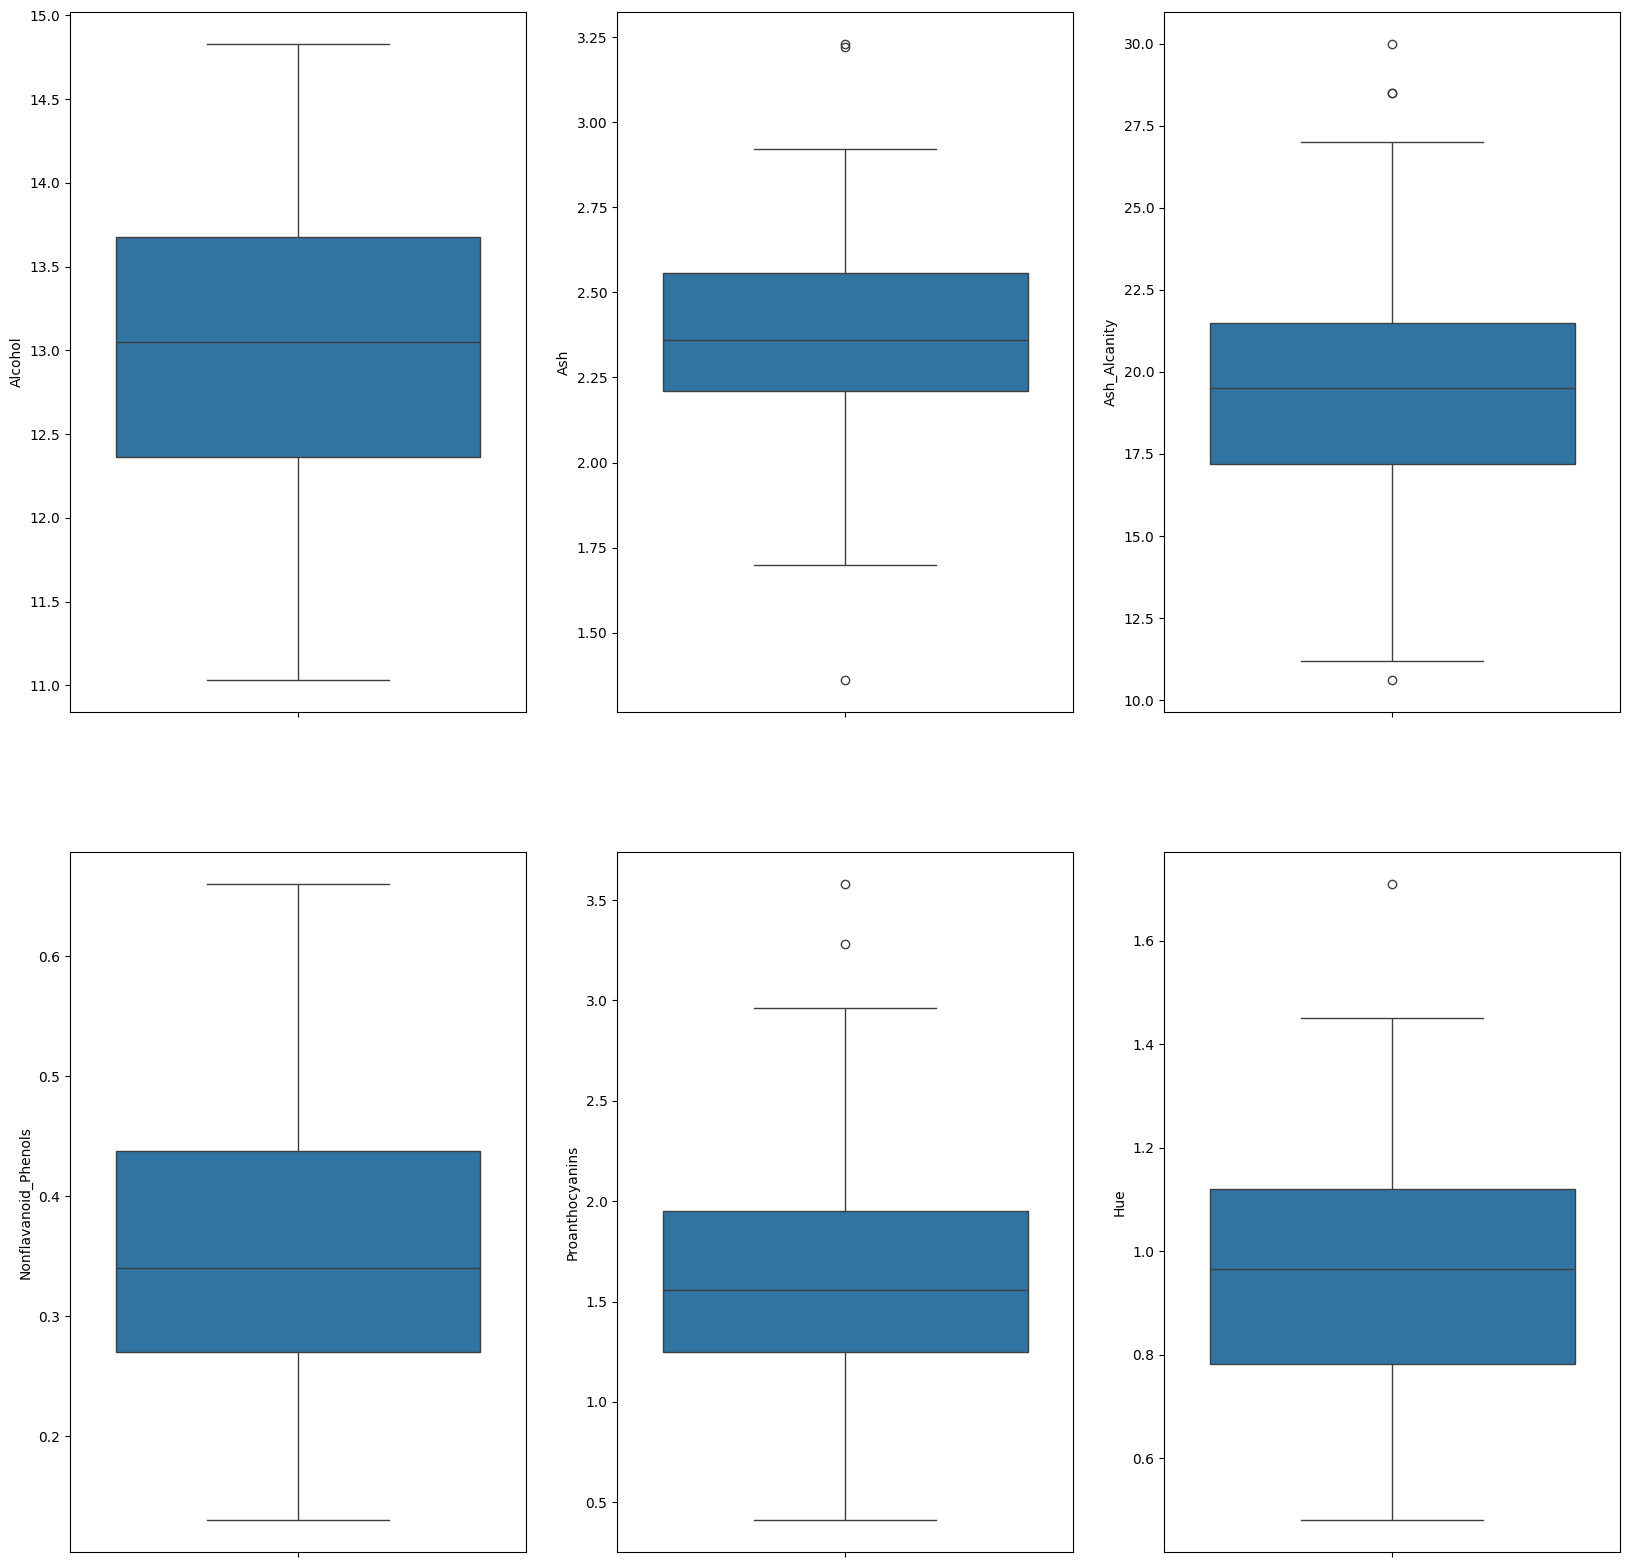

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

index = 0
ax = ax.flatten()

for column in normal_columns:
    sns.boxplot(data=df[column], ax=ax[index])
    index += 1

<Axes: >

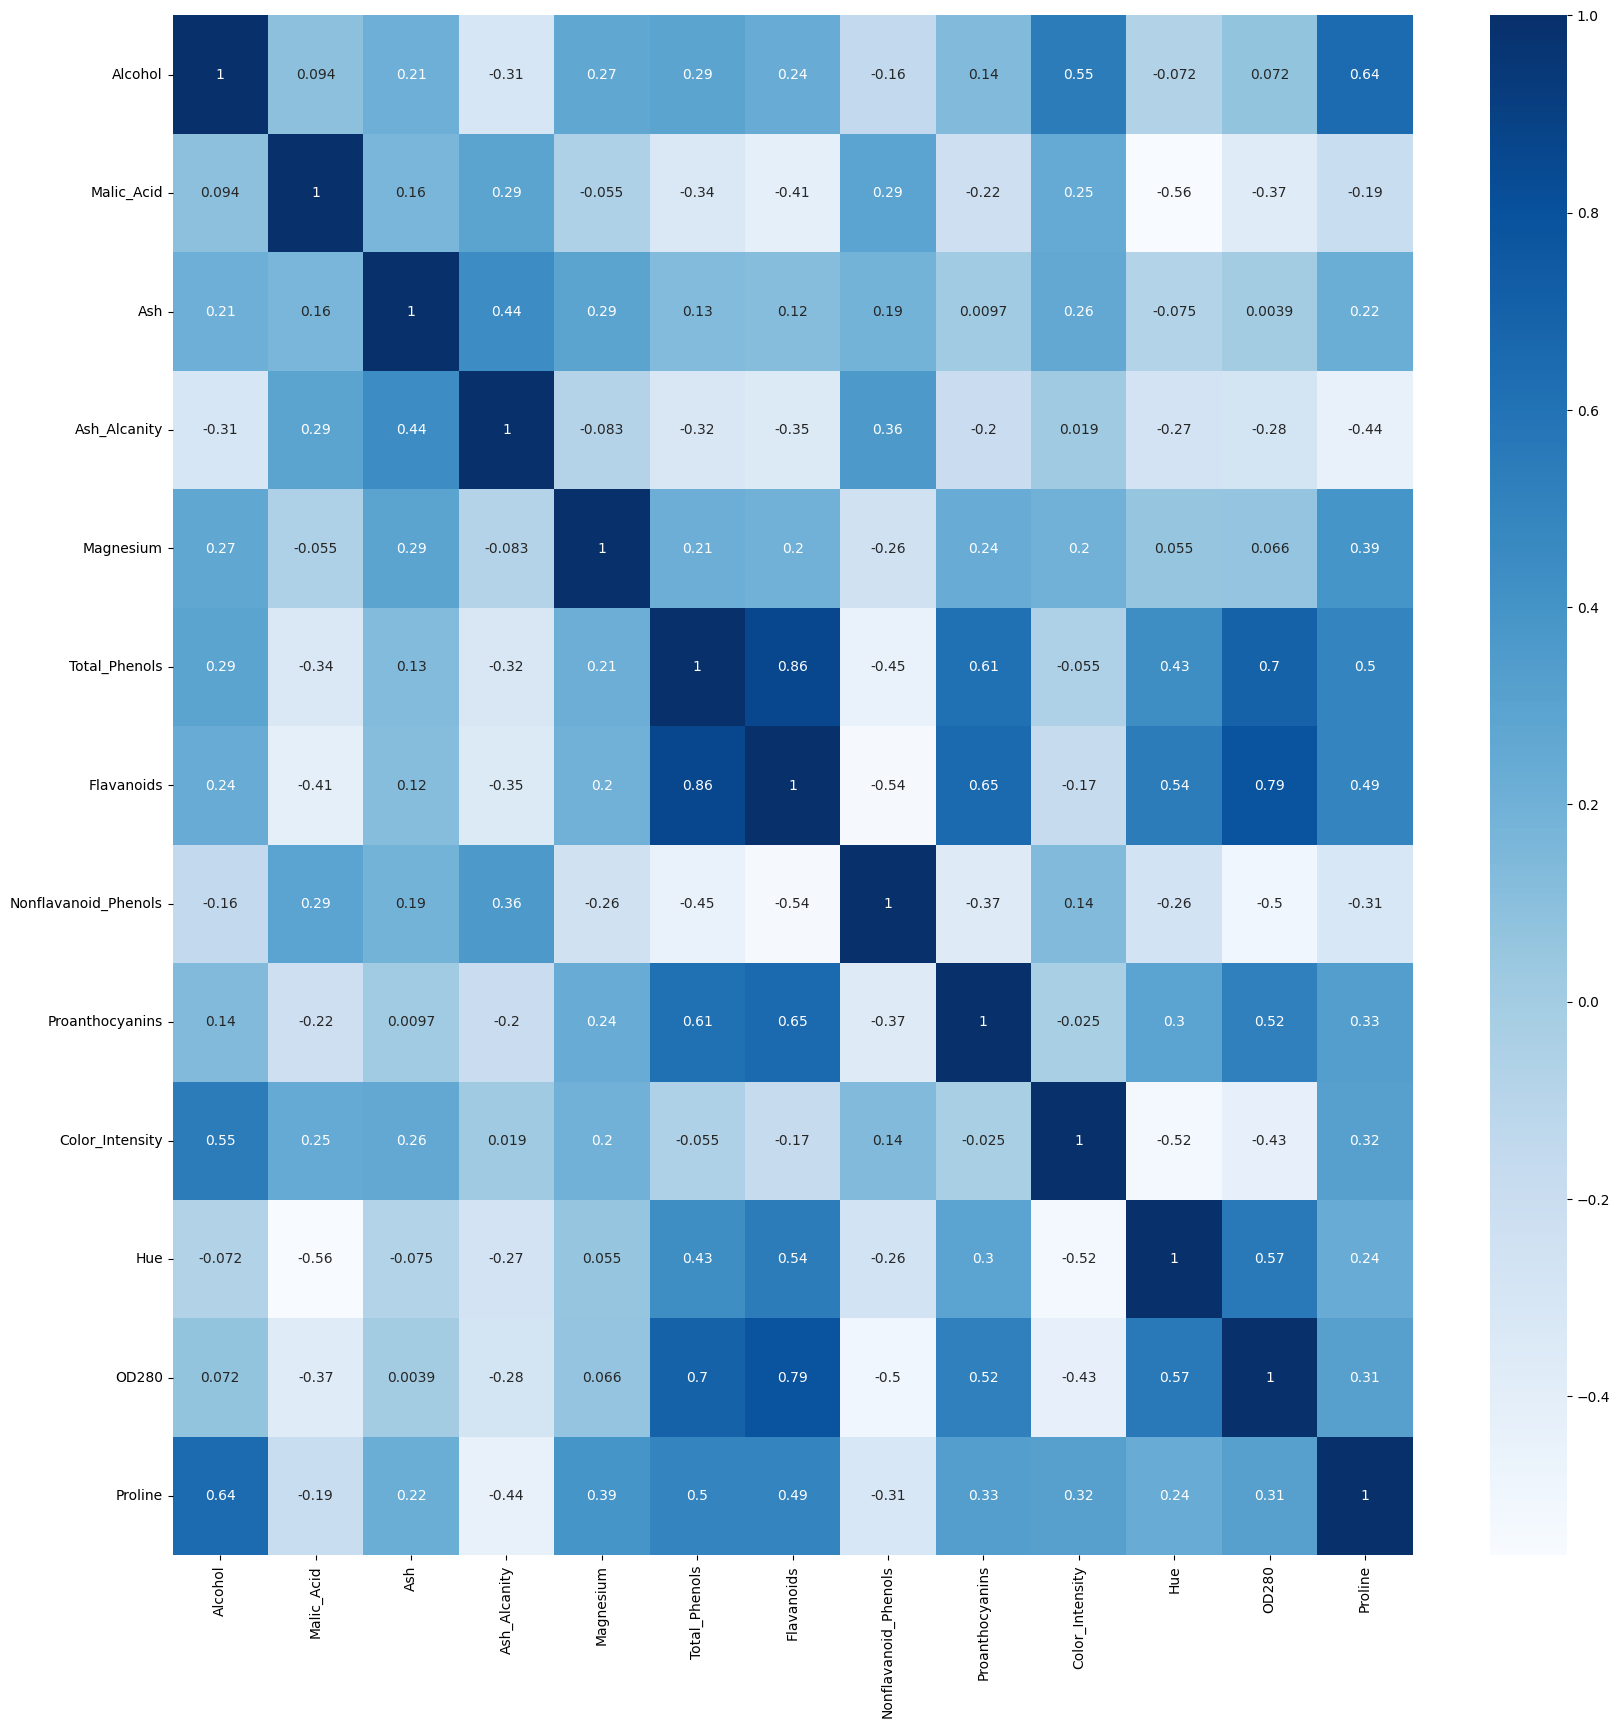

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Кластеризация

In [14]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [15]:
X = df.copy(deep=True)

In [16]:
# PCA data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
def build_pred(predictions):
    df_pca = pd.DataFrame(data = PCA(n_components=2).fit_transform(df))

    plt.figure(figsize=(7, 5))

    sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=predictions, palette='tab10')
    
    plt.title('Результаты кластеризации')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show();

In [18]:
def clustering_metrics(predictions):
    silhouette = metrics.silhouette_score(X_pca, predictions)
    davies_bouldin = metrics.davies_bouldin_score(X_pca, predictions)
    calinski_harabasz = metrics.calinski_harabasz_score(X_pca, predictions)
    
    print(f'Силуэт скор - {silhouette}')
    print(f'Дэвид Боулдин скор - {davies_bouldin}')
    print(f'Калински Харабаш скор - {calinski_harabasz}')

    return silhouette, davies_bouldin, calinski_harabasz

#### KMeans

C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

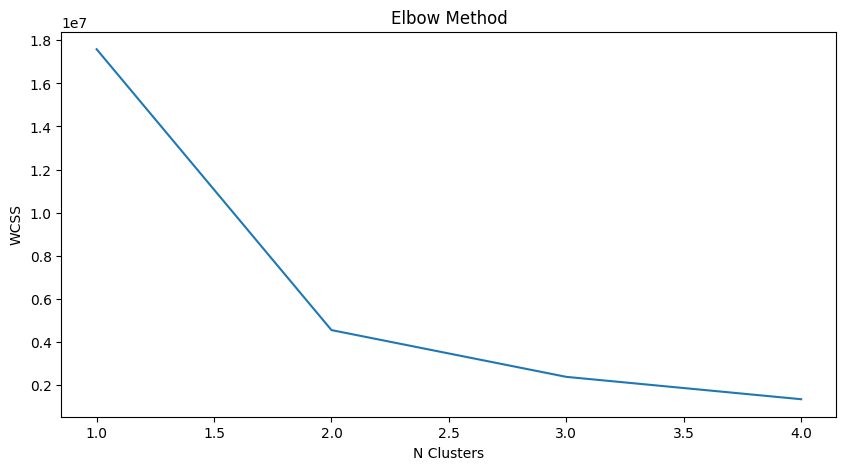

In [19]:
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

plt.plot(range(1, 5), wcss)

plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('N Clusters')
plt.show();

In [20]:
clusters_num = 3

In [21]:
kmeans = KMeans(n_clusters=clusters_num, init='k-means++', random_state=42)
kmeans.fit(X_pca)

C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

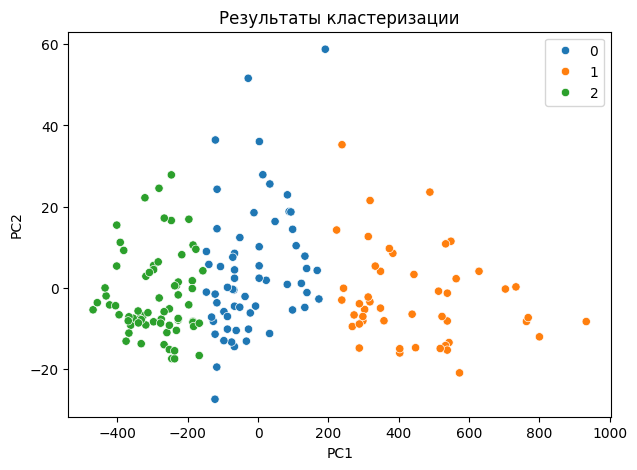

In [22]:
build_pred(kmeans.labels_)

Silhouette score - чем больше - тем лучше. Измеряет, насколько хорошо точка подходит данному кластеру.  
David Bouldin score - чем меньше - тем лучше.  Измеряет то, насколько схожи кластеры.  
Calinski Harabasz score - чем больше - тем лучше. Измеряет способность модели разделить данные на кластеры.  

In [23]:
kmeans_s, kmeans_db, kmeans_ch = clustering_metrics(kmeans.labels_)

Силуэт скор - 0.5722554756855064
Дэвид Боулдин скор - 0.5329686115243172
Калински Харабаш скор - 562.5187518777304


#### Иерархическая

Метод linkage строит матрицу, в которой хранится информация о расстоянии между кластерами. Есть разные методы вычисления расстояния, здесь бдуем использовать метод Уорда.  
Метод Уорда (Ward's linkage): расстояние между кластерами равно приросту суммы квадратов расстояний от точек до центроидов кластеров при объединении этих кластеров. Этот метод стремится минимизировать внутрикластерную дисперсию. Расстояние Уорда рассчитывается на основе евклидового  

<img src='https://habrastorage.org/getpro/habr/upload_files/264/a2b/2d2/264a2b2d2fb19121fe77aa17525c1c42.svg'/>

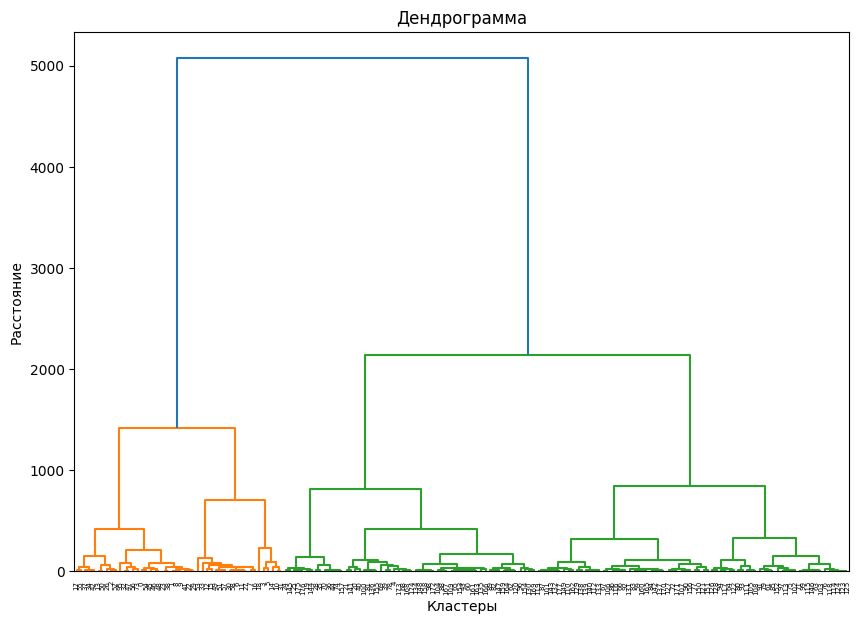

In [24]:
linkage_matrix = linkage(X_pca, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма')
plt.ylabel('Расстояние')
plt.xlabel('Кластеры')
plt.show();

In [25]:
n_clusters = 4

In [26]:
agglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
pred = agglomerative.fit_predict(X_pca)

C:\Users\Sergey\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


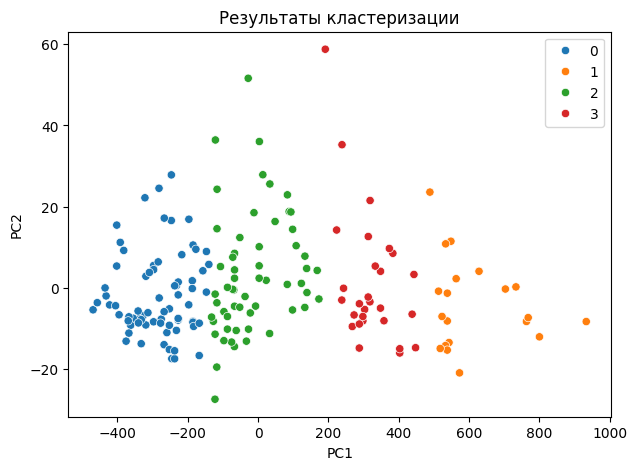

In [27]:
build_pred(pred)

In [28]:
agglomerative_s, agglomerative_db, agglomerative_ch = clustering_metrics(pred)

Силуэт скор - 0.5619198165355057
Дэвид Боулдин скор - 0.5523295795815448
Калински Харабаш скор - 672.0227741756657


#### BIRCH

In [29]:
birch = Birch(branching_factor=30, n_clusters=4, threshold=2.5)
pred = birch.fit_predict(X_pca)

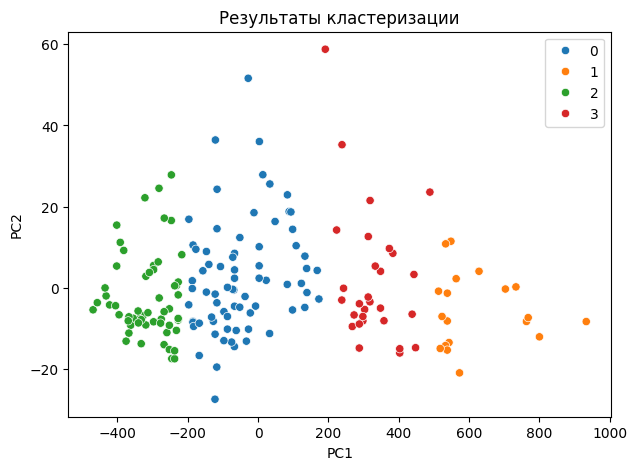

In [30]:
build_pred(pred)

In [31]:
birch_s, birch_db, birch_ch = clustering_metrics(pred)

Силуэт скор - 0.5396018319643519
Дэвид Боулдин скор - 0.5591299382712307
Калински Харабаш скор - 630.7033694994341


#### Сравнение

In [32]:
columns = ['Model', 'Silhouette_score', 'David_Bouldin_score', 'Calinski_Harabasz_score']
data = [['KMeans', 'Agglomerative', 'BIRCH'], 
        [kmeans_s, agglomerative_s, birch_s], 
        [kmeans_db, agglomerative_db, birch_db], 
        [kmeans_ch, agglomerative_ch, birch_ch]]

df_sravnenie = pd.DataFrame(columns=columns)
index = 0

for column in columns:
    df_sravnenie[column] = data[index]
    index += 1

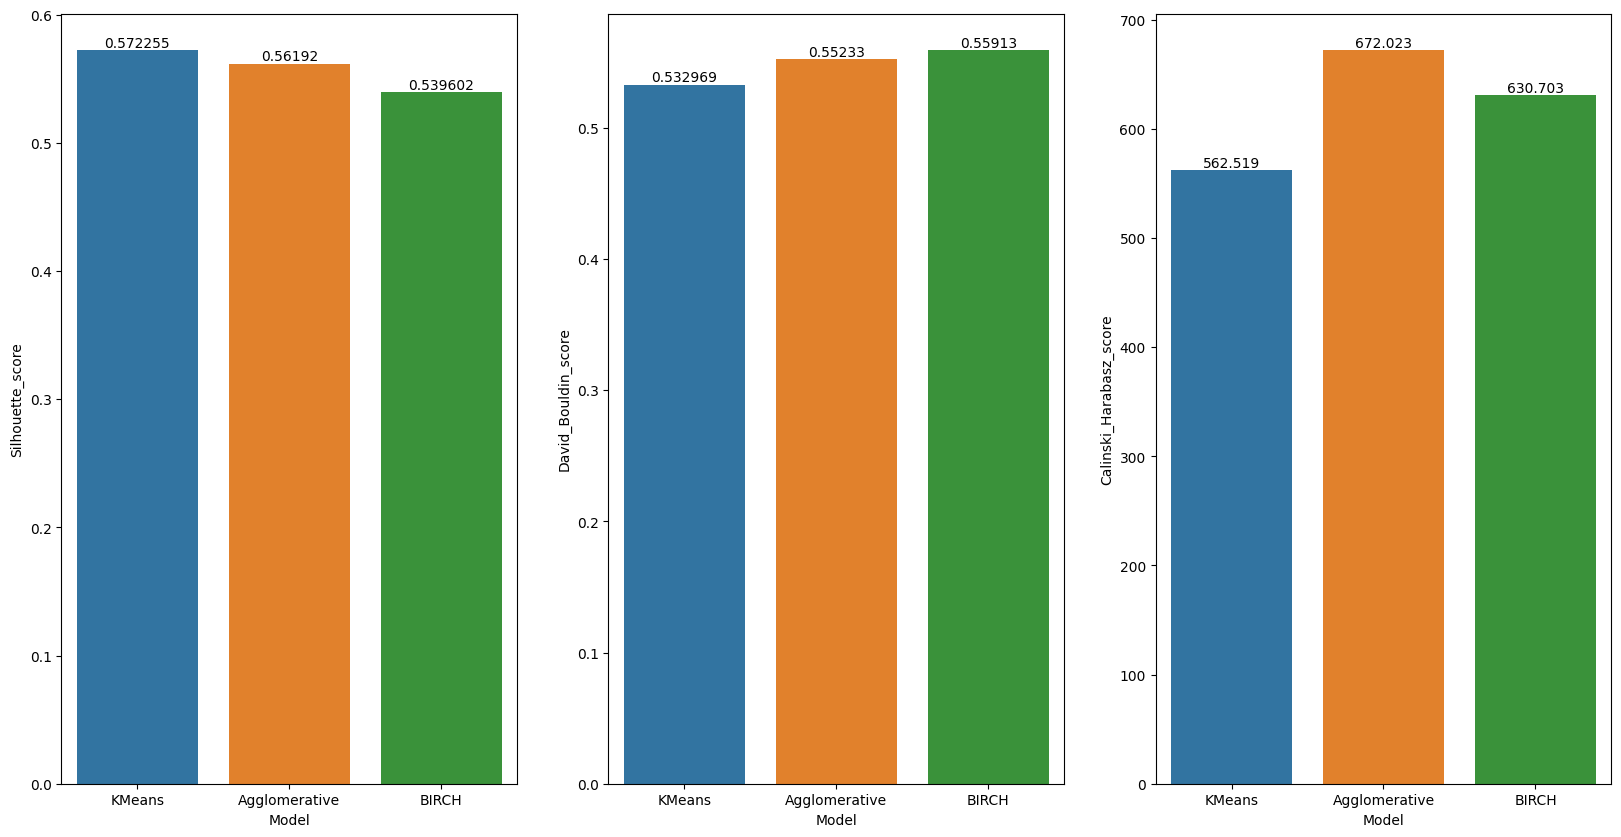

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax = ax.flatten()
index = 0

for column in df_sravnenie.iloc[:, 1:]:
    ax2 = sns.barplot(y=df_sravnenie[column], x=df_sravnenie['Model'], hue=df_sravnenie['Model'], palette='tab10', ax=ax[index])
    for i in ax2.containers:
        ax2.bar_label(i,)
    
    index += 1

In [34]:
df['Cluster'] = kmeans.labels_

In [35]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [36]:
df.columns[:-1]

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [37]:
df.groupby('Cluster').mean().T

Cluster,0,1,2
Alcohol,12.929839,13.804468,12.516667
Malic_Acid,2.504032,1.883404,2.494203
Ash,2.408065,2.426170,2.288551
Ash_Alcanity,19.890323,17.023404,20.823188
Magnesium,103.596774,105.510638,92.347826
Total_Phenols,2.111129,2.867234,2.070725
Flavanoids,1.584032,3.014255,1.758406
Nonflavanoid_Phenols,0.388387,0.285319,0.390145
Proanthocyanins,1.503387,1.910426,1.451884
Color_Intensity,5.650323,5.702553,4.086957


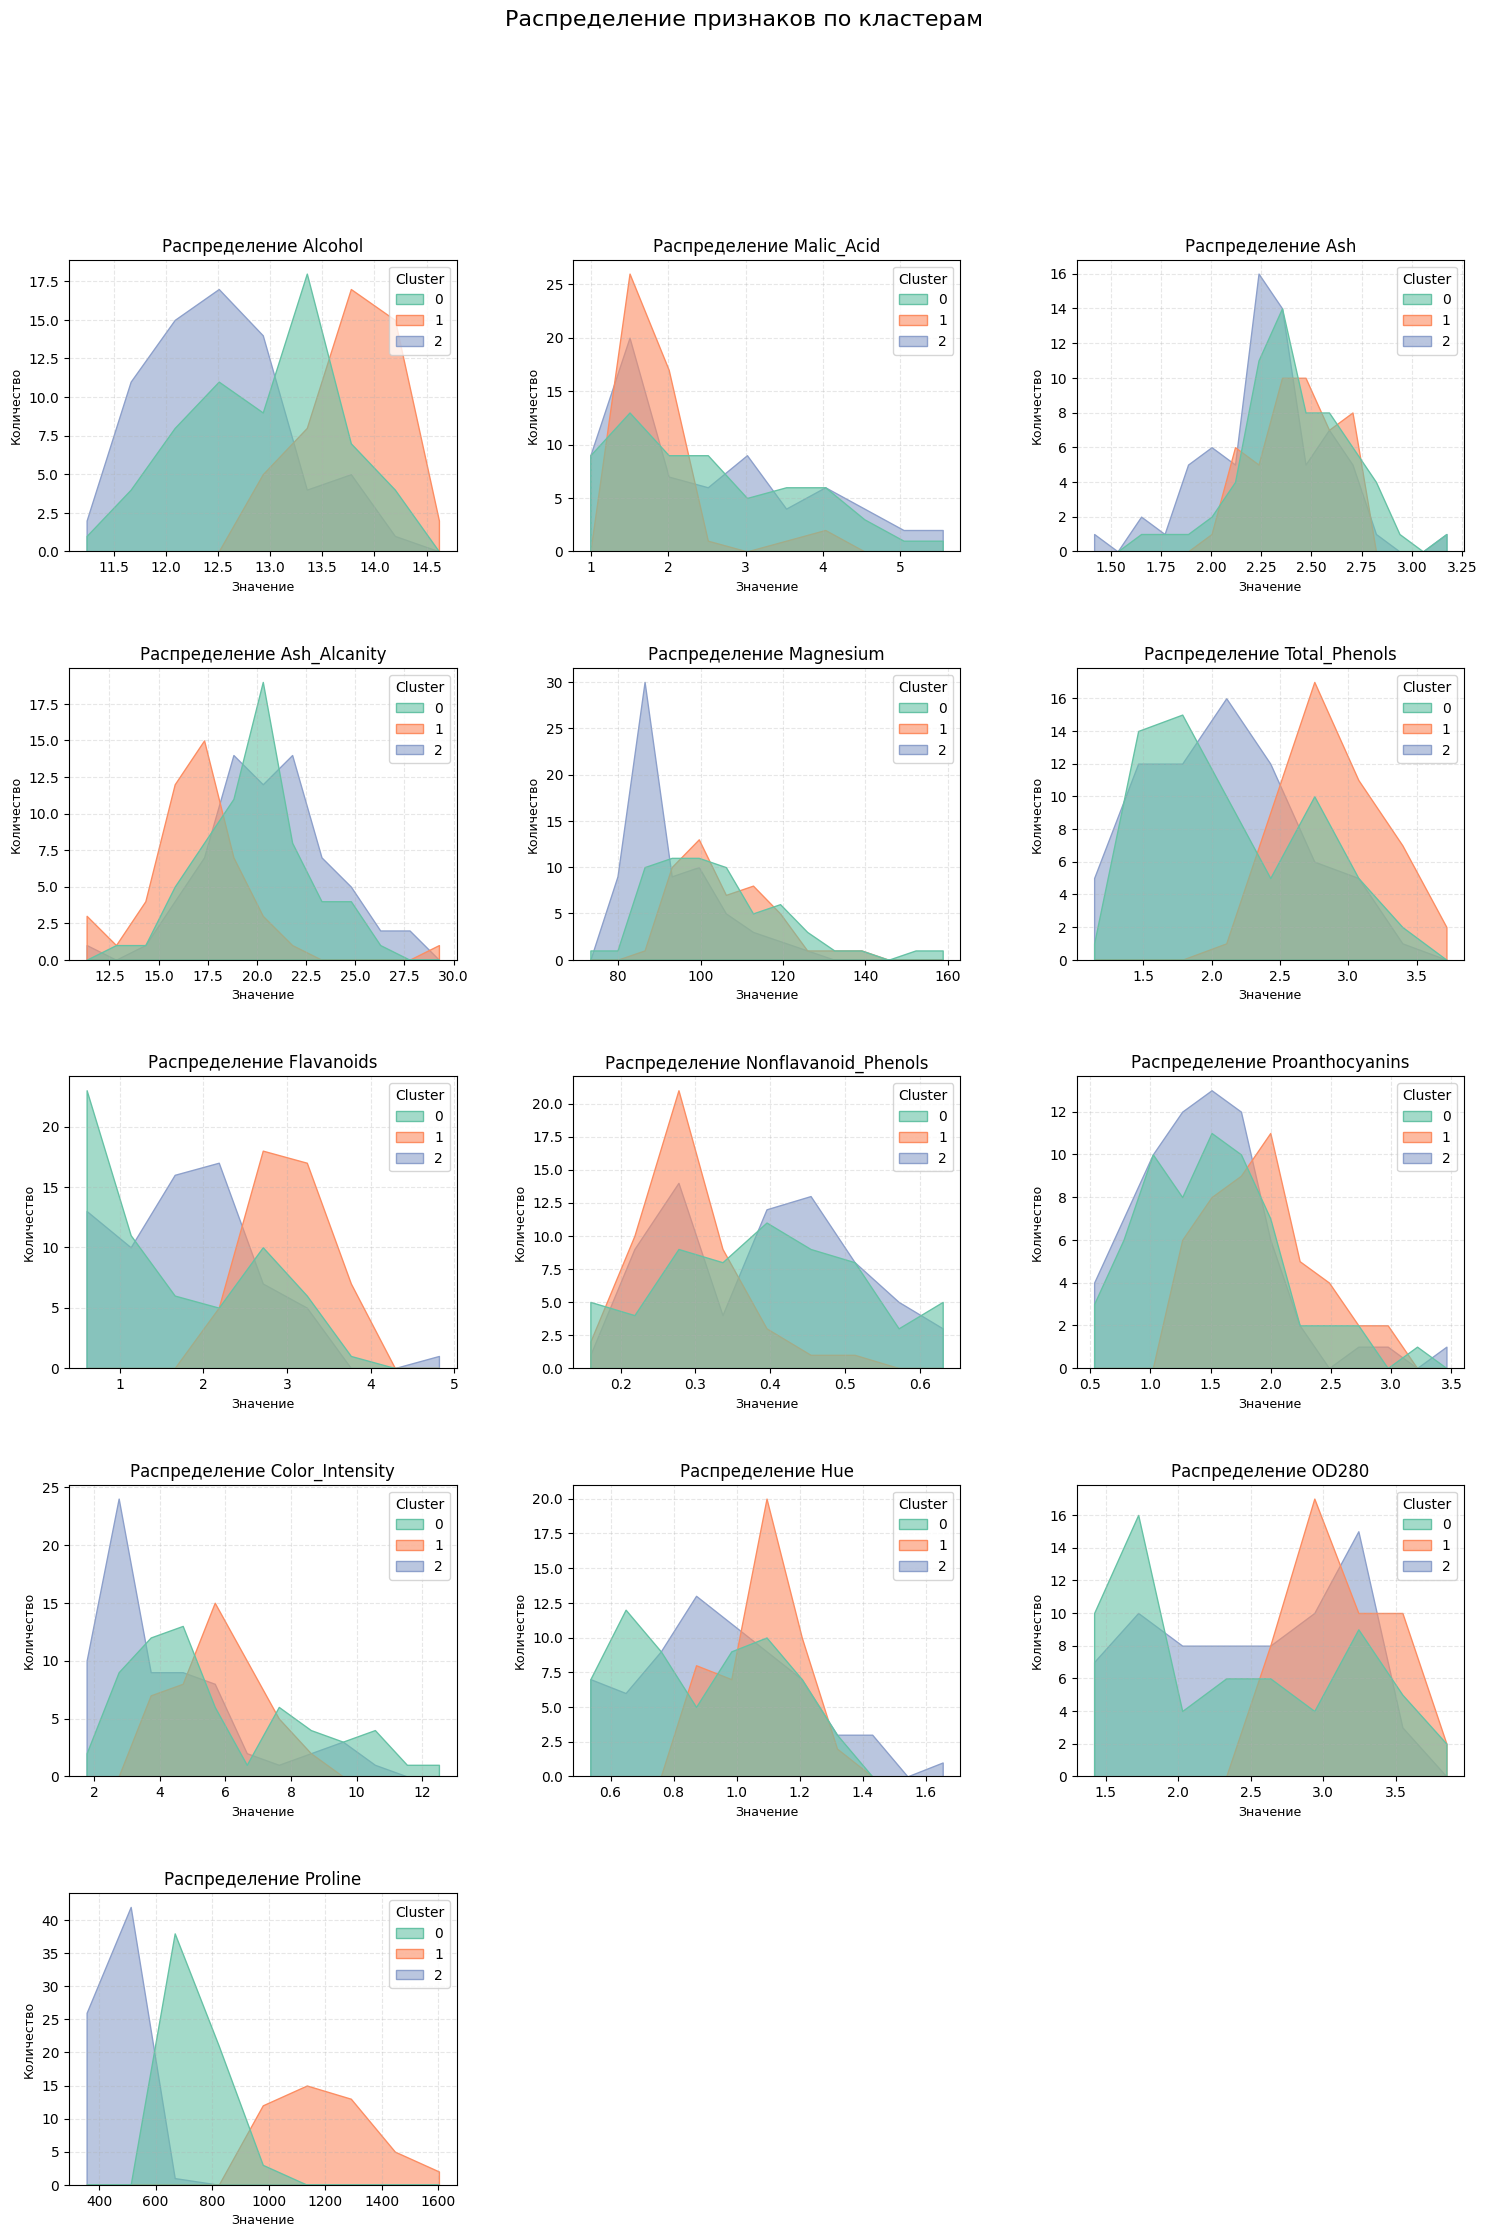

In [38]:
# Создаем список всех числовых признаков (исключая кластер)
features = df.columns.drop('Cluster').tolist()

# Определяем размер сетки графиков
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

# Создаем сетку графиков
plt.figure(figsize=(18, n_rows*5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(features, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    
    # Строим распределение для каждого признака
    sns.histplot(
        data=df,
        x=feature,
        hue='Cluster',
        palette="Set2",
        element="poly",
        alpha=0.6,
        multiple="layer",
        legend=True
    )
    
    # Настройки подграфика
    ax.set_title(f"Распределение {feature}", fontsize=12)
    ax.set_xlabel("Значение", fontsize=9)
    ax.set_ylabel("Количество", fontsize=9)
    ax.grid(linestyle='--', alpha=0.3)

plt.suptitle("Распределение признаков по кластерам", fontsize=16)
plt.show()

In [39]:
df['Cluster'].value_counts()

Cluster
2    69
0    62
1    47
Name: count, dtype: int64

### Классификация

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from statsmodels.tsa.stattools import adfuller

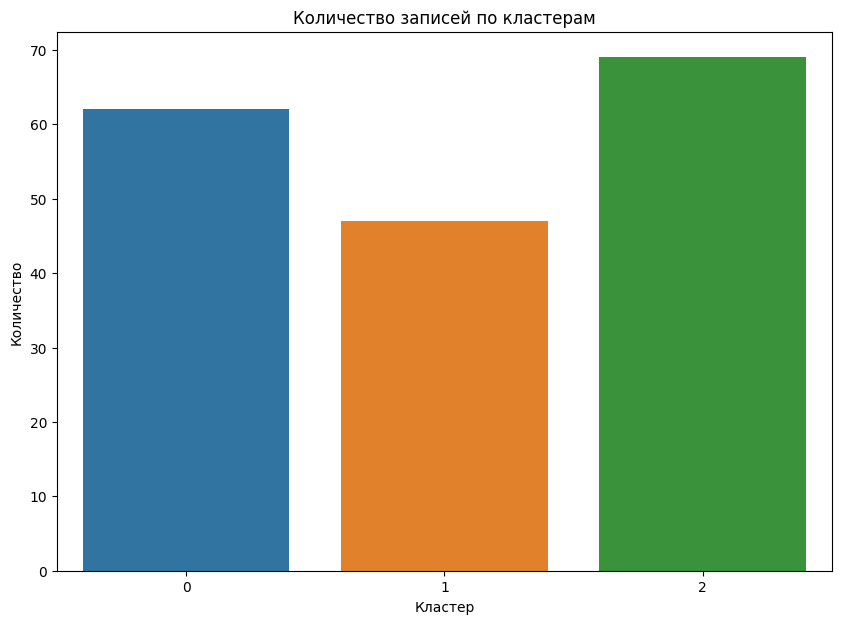

In [40]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Cluster', hue='Cluster', palette='tab10', legend=False)
plt.title('Количество записей по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.show();

In [50]:
min_cluster = min(df['Cluster'].value_counts().tolist())

for cluster in df['Cluster'].unique():
    for_delete = df[df['Cluster'] == cluster].shape[0] - min_cluster
    drop_indices = np.random.choice(df[df['Cluster'] == cluster].index, for_delete, replace=False)
    df.drop(drop_indices, inplace=True)

0
15
22


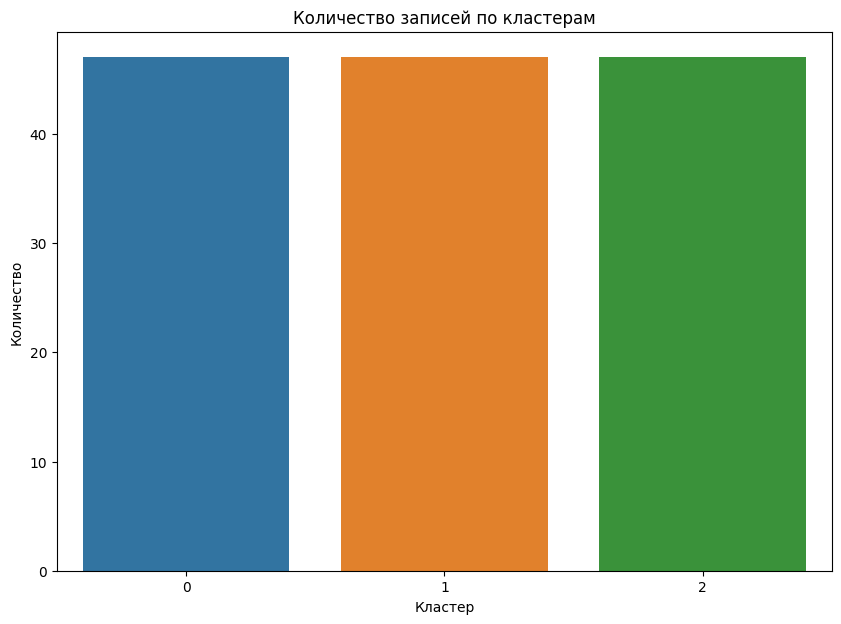

In [51]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Cluster', hue='Cluster', palette='tab10', legend=False)
plt.title('Количество записей по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.show();

In [53]:
y = df['Cluster']
X = df.drop('Cluster', axis=1)

In [54]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
def estimator_learning(estimator):
    print(f'----------------{estimator}----------------')
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)

    print('Classification report')
    classification_report(prediction, y_test)

    estimator_f1 = f1_score(prediction, y_test, average='weighted')
    print(f'F1 score wighted: {estimator_f1}\n\n')

    f1 = make_scorer(f1_score, average='weighted')
    cv_res = cross_val_score(estimator, X_train, y_train, cv=5, scoring=f1)
    cv_res = pd.DataFrame(cv_res)
    mean_cv_res = cv_res[0].mean()
    print('Cross validation')
    display(cv_res)
    print(f'Mean cv result: {mean_cv_res}')

    return estimator_f1, mean_cv_res, prediction

#### KNN

In [70]:
knn = KNeighborsClassifier()
knn_f1, knn_mean_cv, knn_pred = estimator_learning(knn)

----------------KNeighborsClassifier()----------------
Classification report
F1 score wighted: 1.0


Cross validation


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


Mean cv result: 1.0


#### RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()
rfc_f1, rfc_mean_cv, rfc_pred = estimator_learning(rfc)

----------------RandomForestClassifier()----------------
Classification report
F1 score wighted: 1.0


Cross validation


,0
0,1.00000
1,1.00000
2,0.94673
3,1.00000
4,1.00000


Mean cv result: 0.9893460925039872


#### CatBoost

In [74]:
catboost = CatBoostClassifier(logging_level='Silent')
catboost_f1, catboost_mean_cv, catboost_pred = estimator_learning(catboost)

----------------<catboost.core.CatBoostClassifier object at 0x0000024AB92C5280>----------------
Classification report
F1 score wighted: 1.0


Cross validation


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


Mean cv result: 1.0


In [75]:
columns = ['Classifier', 'F1_score', 'Mean_CV_res']
data = [['KNN', 'Random_Forest', 'CatBoost'],
        [knn_f1, rfc_f1, catboost_f1],
        [knn_mean_cv, rfc_mean_cv, catboost_mean_cv]]

df_sravnenie = pd.DataFrame(columns=columns)
index = 0

for column in columns:
    df_sravnenie[column] = data[index]
    index += 1

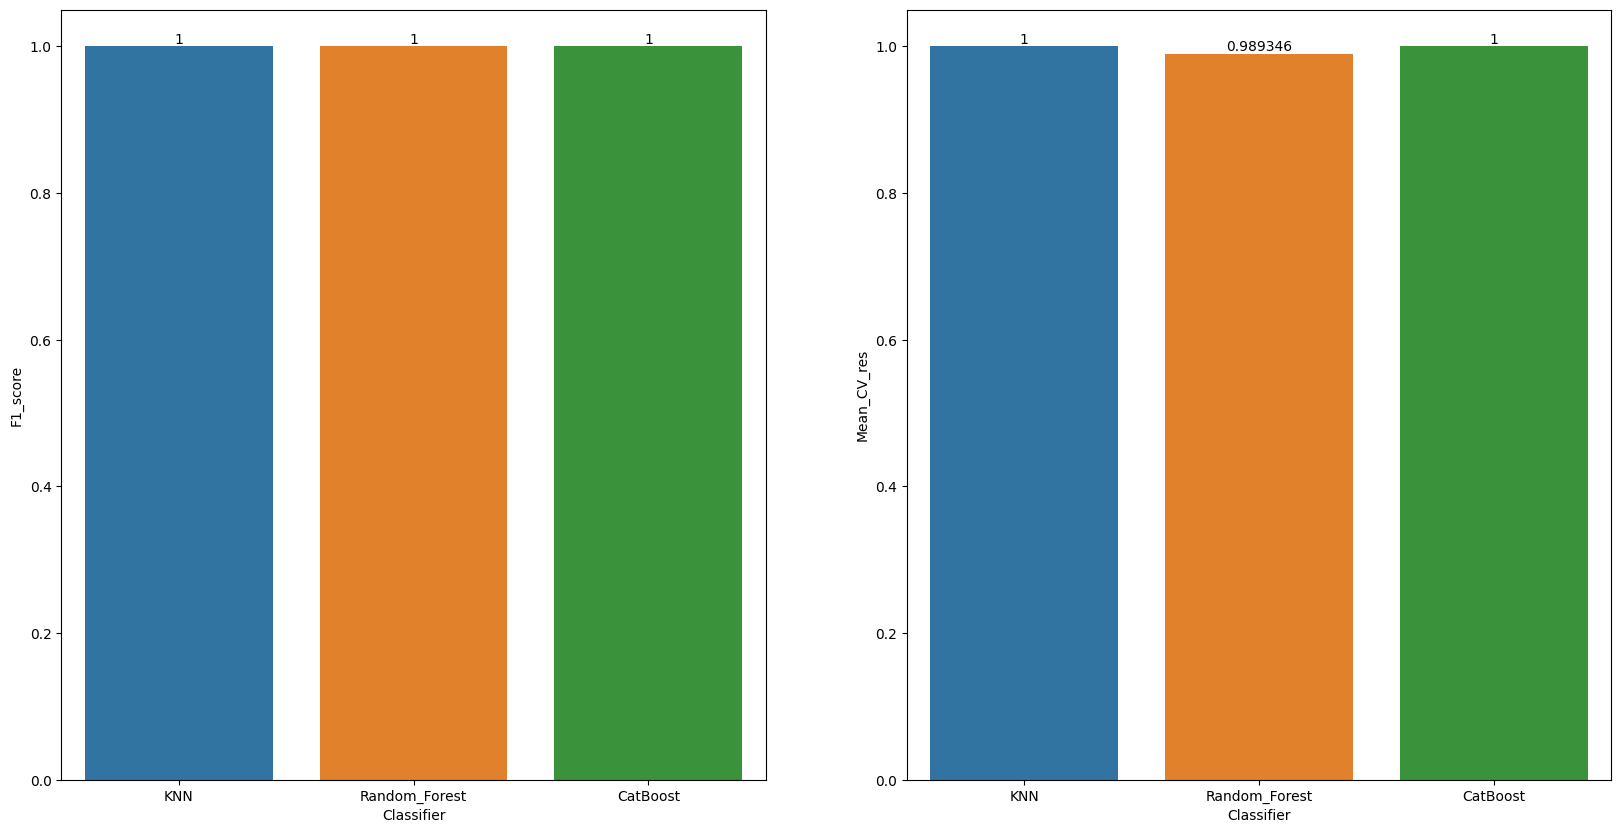

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax = ax.flatten()
index = 0

for column in df_sravnenie.iloc[:, 1:]:
    ax2 = sns.barplot(y=df_sravnenie[column], x=df_sravnenie['Classifier'], hue=df_sravnenie['Classifier'], palette='tab10', ax=ax[index])
    for i in ax2.containers:
        ax2.bar_label(i,)
    
    index += 1